In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import re


In [26]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mhumet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mhumet\AppData\Roaming\nltk_data...


True

In [2]:
!python.exe -m pip install --upgrade pip

  Using cached pip-23.0.1-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 22.2.2
    Uninstalling pip-22.2.2:
      Successfully uninstalled pip-22.2.2


In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mhumet\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [3]:
! pip install sklearn

  Using cached sklearn-0.0.post1-py3-none-any.whl


In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

In [6]:
#loading the json files. 
data = pd.read_json('recipes.json', lines=True)

In [7]:
data['Ingredients'].head(5)

0    [200g dark muscovado sugar, 175g butter, chopp...
1    [500g strong white flour, plus extra for dusti...
2    [280g self-raising flour, 175g golden caster s...
3    [2 carrots, halved, ½ white cabbage, shredded,...
4    l double cream, 400g Greek yoghurt, 4 tbs...
Name: Ingredients, dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         1615 non-null   object
 1   url          1615 non-null   object
 2   Description  1427 non-null   object
 3   Author       1609 non-null   object
 4   Ingredients  1615 non-null   object
 5   Method       1615 non-null   object
dtypes: object(6)
memory usage: 75.8+ KB


In [10]:
#cleaning the dataset
data['Ingredients'] = data['Ingredients'].map(lambda x: re.sub(r'[^a-zA-Z ] ', ' ', str(x)))

In [11]:
data = data.dropna(subset=['Ingredients'])

In [14]:
#find stop words, along with recipe realted stopwords
stop = stopwords.words('english') + ['tsp', 'tbsp', 'finely','extra', 'chopped' ]
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [15]:
def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

In [16]:
def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text

In [17]:
#lemmatize the text
data['Ingredients'] = data['Ingredients'].apply(remove_encoding_text)

In [18]:
text = ' '.join(words for words in data['Ingredients'])
len(text)

408178

In [27]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [28]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [29]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')

In [30]:

tdm = vectorizer.fit_transform(data['Ingredients'])

c:\Users\mhumet\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [31]:
vectorizer.vocabulary_.items()

dict_items([('dark muscovado', 3223), ('muscovado butter', 7093), ('butter luxury', 1208), ('luxury mixed', 6559), ('mixed dried', 6980), ('dried glac', 3681), ('glac grated', 4699), ('grated fresh', 4906), ('fresh root', 4369), ('root juice', 9536), ('juice dark', 5657), ('dark brandy', 3194), ('brandy orange', 855), ('orange pecannuts', 7653), ('pecannuts roughly', 8090), ('roughly large', 9637), ('large egg', 5868), ('egg ground', 3867), ('ground plain', 5144), ('plain baking', 8514), ('baking mixed', 342), ('mixed pack', 7018), ('pack used', 7829), ('used warm', 12321), ('warm apricotjam', 12605), ('apricotjam shredless', 190), ('shredless pack', 10231), ('pack fondant', 7759), ('fondant sugar', 4239), ('sugar gold', 11369), ('gold silver', 4733), ('silver gold', 10255), ('silver sugared', 10260), ('strong white', 11335), ('white flour', 12781), ('flour plus', 4199), ('plus sachet', 8773), ('sachet dried', 9745), ('dried unsalted', 3748), ('unsalted butter', 12149), ('butter soften

In [32]:
#finally lets create the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [33]:
tfidf_weights[0:10]

[('dark muscovado', 7.19925237469466),
 ('muscovado butter', 1.3095575592001647),
 ('butter luxury', 0.5561055162200004),
 ('luxury mixed', 1.110134004285181),
 ('mixed dried', 6.146265055824797),
 ('dried glac', 1.086516135213231),
 ('glac grated', 0.5561055162200004),
 ('grated fresh', 0.5561055162200004),
 ('fresh root', 2.9441233250507133),
 ('root juice', 0.5561055162200004)]

In [35]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=2000).fit_words(dict(tfidf_weights))

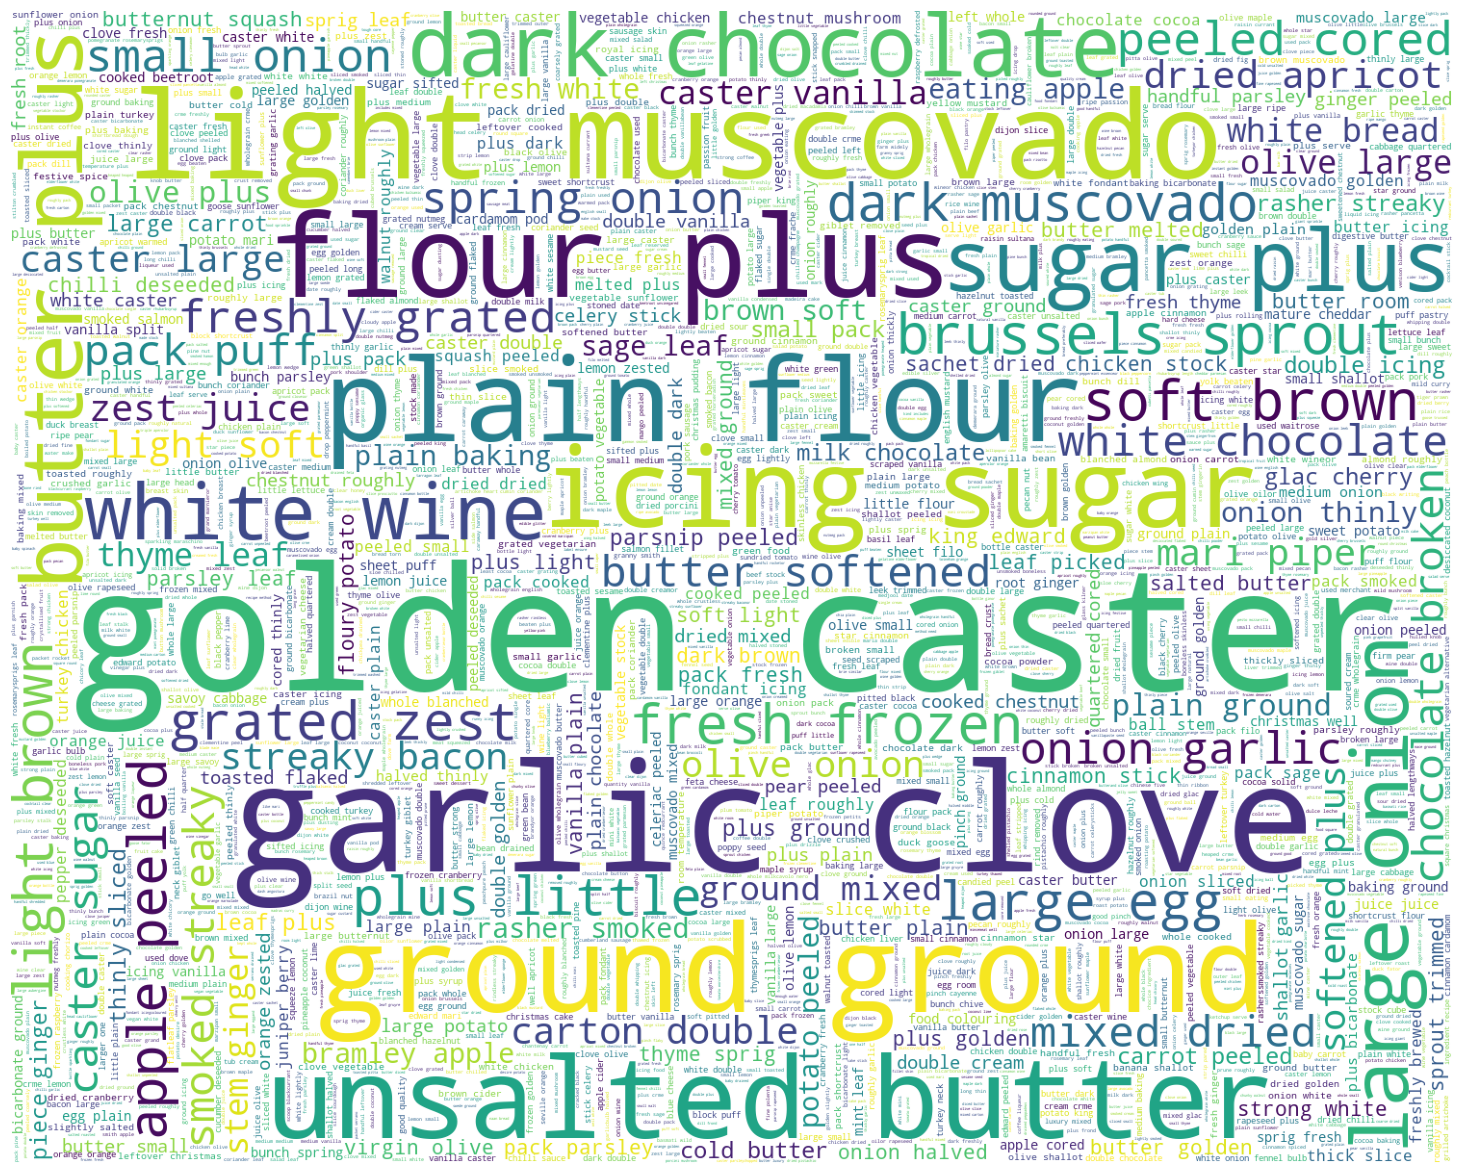

In [36]:
plt.figure(figsize=(20,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')